<div align="center">

**Lab Report Title**  
*Voltage regulator with operational amplifier*

**Course:** ELECTRONICS 2 

**Date:** 17/06/2025


**Group Members**

| Full Name                 | Matriculation No. |
| ------------------------- | ----------------- |
| Ashu Nkongho Tekoh        | 2756129           |
| Enes Gjana                | 2770615           |
| Elhama Adel               | 2756781           |


</div>

In [9]:
#Load all Import

%load_ext autoreload
%autoreload 2

# Introduction and Objective

During this soldering exercise, a voltage regulator with an operational amplifier and additional
components is to be assembled on a perforated board in Eurocard format.

# Preparation

## Part 1: Voltage regulator with operational amplifier
**Objective:**  Prepare detailed documentation, including a component assembly/wiring plan and resistor calculations, for a voltage regulator circuit built on a Eurocard perforated board using a µA741 op-amp, transistors T1 and T2, a Zener diode, and other components. This circuit must provide a stabilized 10V output by having the op-amp compare the divided output voltage (via resistors R3 and R4) with the Zener reference voltage and regulate the output through T1 and T2. This documentation must be completed and approved before starting the soldering exercise.

**1. Calculation of the resistor values.**

The initial conditions are: $U_{E}$ = 15V, $U_{A}$ = 10V and $U_{Z}$ = 5.6V.

By analyzing the circuit and using the virtual short circuit method the following relations were made:

$U_{R4}$ = $U_{Z}$

$U_{3}$ = $U_{Out}$ - $U_{R4}$

$U_{R1}$ = $U_{in}$ - $U_{Z}$

$I_{Z}$ = 5 mA (from the datasheet)

The resistor values are calculated as follows:

**2. Calculation for \(R_1\)**  

$R_1 = \frac{U_{R1}}{I_z} = \frac{U_{\text{in}} - U_z}{I_z} = 1.88  \text{k}\Omega$


**3. Calculation for \(R_3\)**  

$R_3 = \frac{U_{R3}}{1  \text{mA}} = \frac{U_{\text{out}} - U_z}{1  \text{mA}} = 4.4  \text{k}\Omega$
  
    *(Note: $1  \text{mA}$ is a reasonable independently chosen value)*

**4. Calculation for \(R_4\)**  

$R_4 = \frac{U_{R4}}{1  \text{mA}} = \frac{U_z}{1  \text{mA}} = 5.6  \text{k}\Omega$


---

### Standard E12 Series Values
Selected standard resistor values from the E12 series:  
- $R_1 = 1.8  \text{k}\Omega$  
- $R_3 = 4.7  \text{k}\Omega$  
- $R_4 = 5.6  \text{k}\Omega$
    



# Simulation

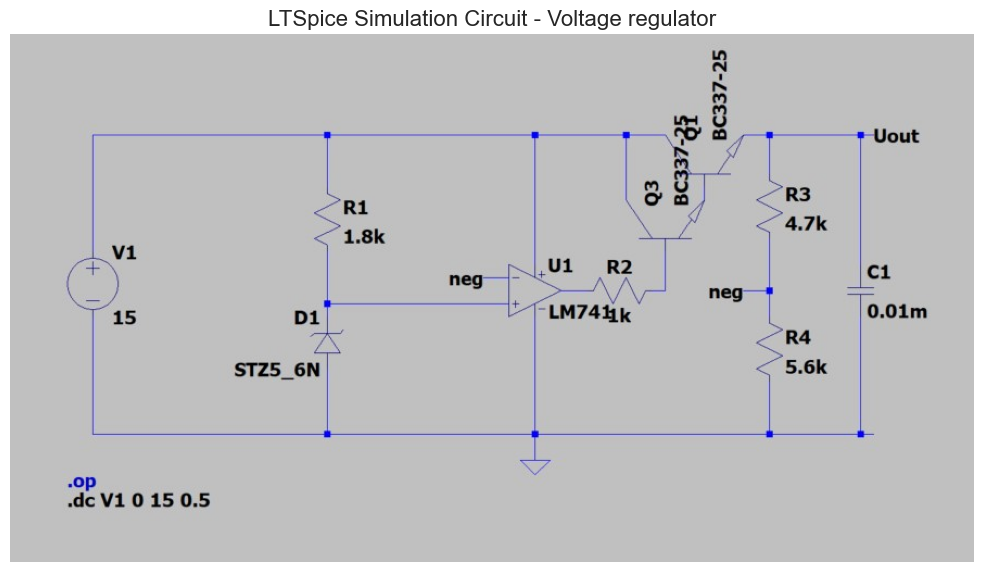

In [10]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/voltage_regulator.jpg'  # change string to name of LTspice image
img_title = "LTSpice Simulation Circuit - Voltage regulator" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

In [11]:
from components.data_import import import_measurement_data, import_simulation_data
from components.data_processing import process_sim_data,process_single_csv
import pandas as pd
# Use the code below if we want to read single .csv files
# Pull a .csv and .txt files in the data folder

IS_DATA_AVAILABLE = True
simulation_data_path = "../data/Prep_Data/lab4sim.txt" # Enter path to simulation data


cleaned_sim_data = pd.DataFrame()


part_2_data = pd.DataFrame()

if IS_DATA_AVAILABLE:
    sim_data = import_simulation_data(simulation_data_path)
    
    # Processing the data
    cleaned_sim_data = process_sim_data (sim_data)
    

[ 24-06-2025, 18:18:22 ] 20 root - INFO - Successfully imported simulation data from ../data/Prep_Data/lab4sim.txt


,v1,V(uout),V(uin)
0,0.0,-0.000542,0.0
1,0.5,0.005405,0.5
2,1.0,0.010999,1.0
3,1.5,0.026274,1.5
4,2.0,0.170650,2.0


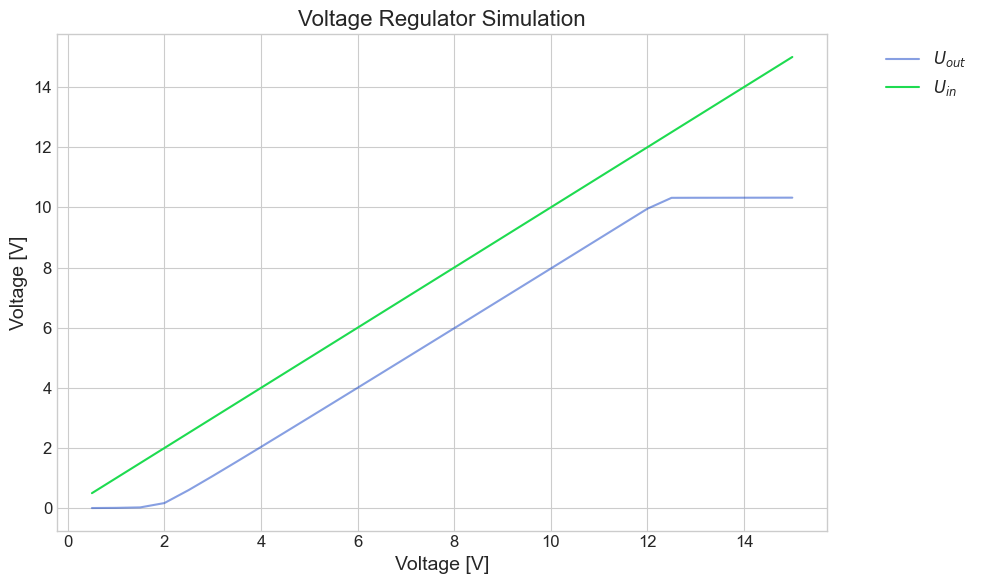

In [12]:
# Plotting multiple data
from components.data_visualizing import plot_multiple_sim_data_2, plot_sim_data
PLOT_MULTI_SIM_DATA = True

if PLOT_MULTI_SIM_DATA:
    fig = plot_sim_data(
        sim_data=sim_data,
        x_label='Voltage [V]',
        y_label= 'Voltage [V]',	
        title='Voltage Regulator Simulation',
        label1 ='$U_{out}$',
        label2='$U_{in}$',
       
        is_multi=True
    )

From the simulation we can verify that the calculated resistor values are correct, we can se the voltage stabilize and resist chnage after the source surpasses 10V. The error is 0.3V, and that comes because we dont have the precise calculated values of the resistors, but the closest one in value in E12 series. 

## Designing the circuit layout.
For the circuit layout, KiCad was chosen due to its comprehensive design tools and flexibility. The initial step involved designing the schematic diagram using KiCad’s Eeschema module. All the necessary components were carefully selected based on the calculated values and assigned appropriate footprints to ensure compatibility with the PCB layout.


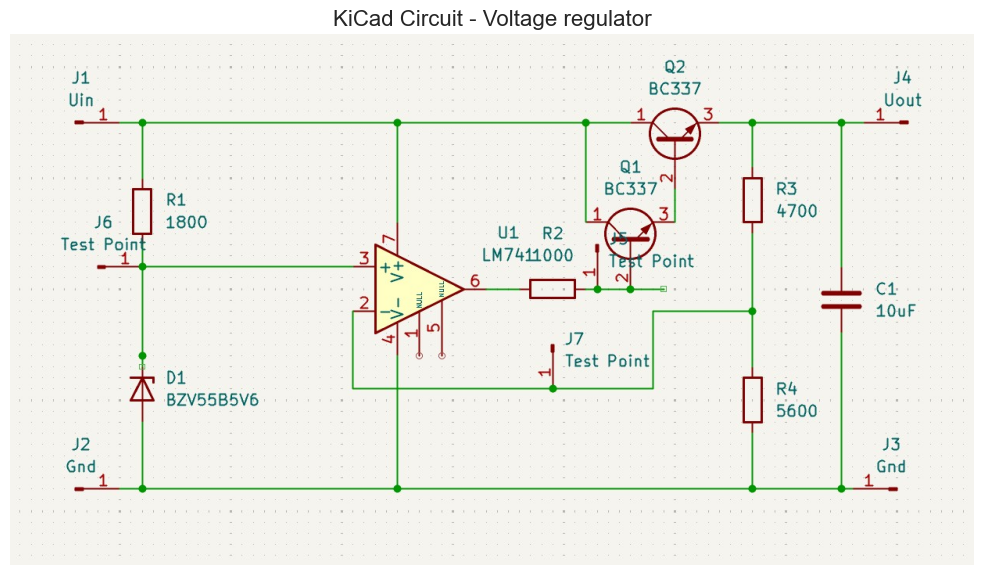

In [13]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/KiCadeschema.jpg'  # change string to name of LTspice image
img_title = "KiCad Circuit - Voltage regulator" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

Once the schematic design was completed and verified, it was transferred to the PCB layout environment. In this stage, components were arranged strategically to optimize space utilization and signal integrity. Careful attention was paid to trace routing to minimize interference and ensure reliable electrical performance.

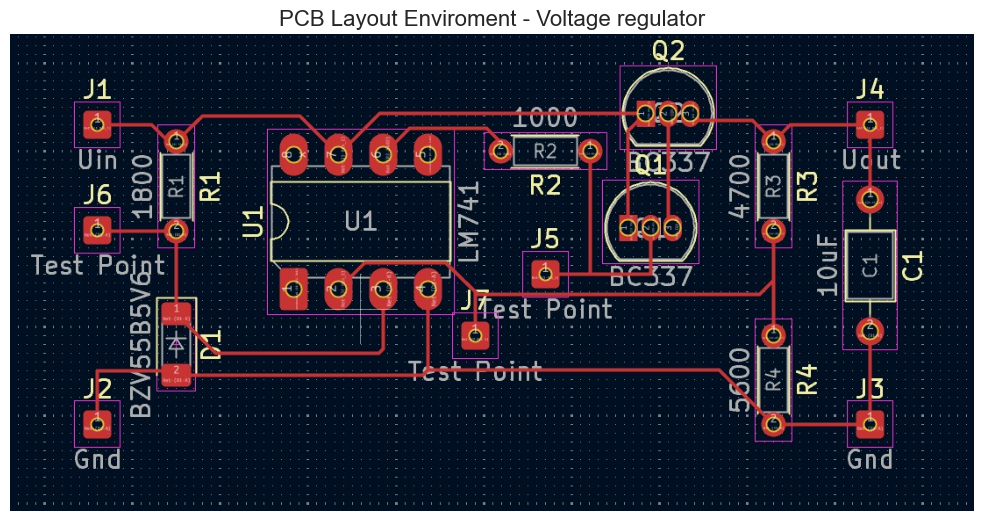

In [14]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/KiCad_pcb_le.jpg'  # change string to name of LTspice image
img_title = "PCB Layout Enviroment - Voltage regulator" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

Following the layout and routing process, the design was rendered in KiCad’s 3D viewer. This allowed for a detailed visualization of the final PCB, offering insights into the physical dimensions, component placement, and overall aesthetic. The result was a compact, well-organized, and visually appealing printed circuit board, ready for fabrication.

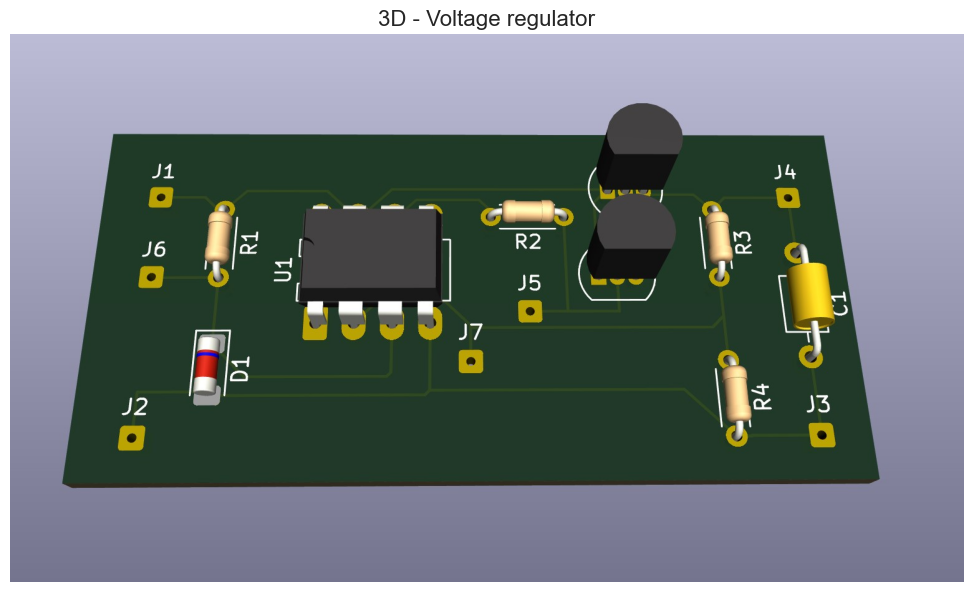

In [15]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/KiCadpcb3D.jpg'  # change string to name of LTspice image
img_title = "3D - Voltage regulator" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

## Lab Task 1.1 – Calculating Internal Resistance of a Voltage Regulator


**Voltage Measurements**

The measured values from the lab are:
| Quantity      | Description                        | (V)         |
|---------------|------------------------------------|-------------|
|     $U_E$     | Input voltage to the regulator     |    15       | 
|     $U_A$     | Output voltage from the regulator  |    10.4     |  
|     $U_{+}$   | Non-inverting input of op-amp      |    5.58     |  
|     $U_{-}$   | Inverting input of op-amp          |    5.61     |    
|     $U_{B1}$  | Output of op-amp                   |    11.37    |     



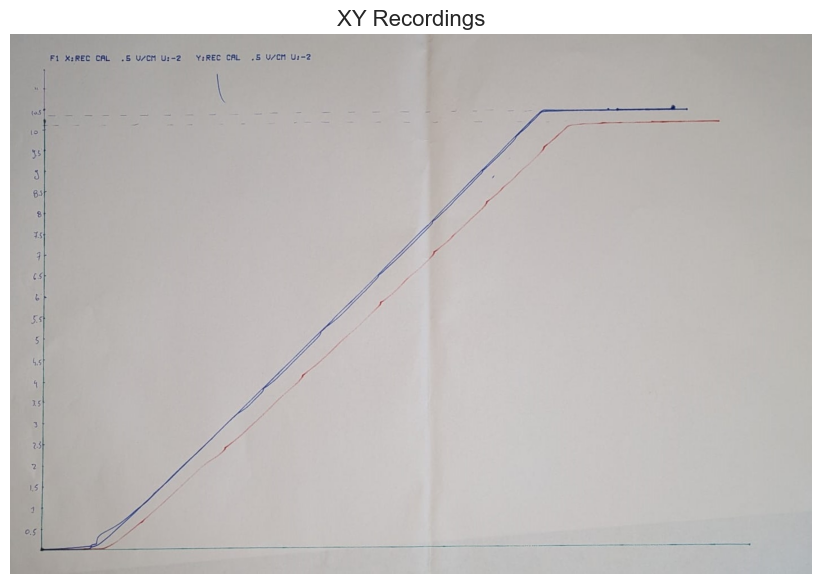

In [16]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/xyrecordings.jpg'  # change string to name of LTspice image
img_title = "XY Recordings" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

The blue line represents the measurement with a very low current, while the red line represents the measurement with a current of 0.5A and a load resistor 10W.


**1. Estimate Load Resistor Value**

Assuming the 10 W resistor was operating near its rated power:


$$R = \frac{V^2}{P} = \frac{(10.1)^2}{10} = \frac{102.01}{10} = 10.2\,\Omega$$




**2. Calculate Load Current**


$$I_A = \frac{V_{\text{load}}}{R} = \frac{10.1}{10.2} \approx 0.99\,\text{A}$$




**3. Calculate Internal Resistance**


$$R_{\text{int}} = \frac{V_{\text{open}} - V_{\text{load}}}{I_A} = \frac{10.4 - 10.1}{0.99} = \frac{0.3}{0.99} \approx 0.303\,\Omega$$



**Final Result

> The internal resistance of the voltage source is approximately:
$$
\boxed{0.30\,\Omega}
$$



**Notes**
- The 10 W resistor value was estimated based on voltage and power.
